In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Importing the Dataset
#Cals list of top 30 countries with X variables
thirty = pd.read_csv('C:\\Users\\D648007\\CalTop30Countries.csv', encoding= 'unicode_escape')
dataset = thirty

In [3]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(30, 16)


In [4]:
dataset.dtypes

TOP 30 RICH       object
Spend 2020       float64
Tax 2020         float64
Gini WHR         float64
Mobility         float64
GDP                int64
Pollution        float64
Democracy        float64
Giving             int64
Obesity          float64
Min wage           int64
Gini             float64
Education         object
Work               int64
Tourism            int64
Ladder (2020)    float64
dtype: object

In [5]:
#Convert Edu from object to float dtype
dataset["Education"] = pd.to_numeric(dataset.Education, errors='coerce')
#Check that conversion has worked
dataset.dtypes

TOP 30 RICH       object
Spend 2020       float64
Tax 2020         float64
Gini WHR         float64
Mobility         float64
GDP                int64
Pollution        float64
Democracy        float64
Giving             int64
Obesity          float64
Min wage           int64
Gini             float64
Education        float64
Work               int64
Tourism            int64
Ladder (2020)    float64
dtype: object

In [6]:
#View first 15 rows to see what the data is like
#Top 30 RICH
#Spend 2020 - 
#Tax 2020 -
#Gini WHR -
#Mobility - 
#GDP - 
#Pollution - 
#Democracy - 
#Giving - 
#Obesity - 
#Min wage - 
#Gini - 
#Education - 
#Work - 
#Tourism - 
#Ladder (2020) - Happiness score OUTCOME VARIABLE
dataset.head(15)


,TOP 30 RICH,Spend 2020,Tax 2020,Gini WHR,Mobility,GDP,Pollution,Democracy,Giving,Obesity,Min wage,Gini,Education,Work,Tourism,Ladder (2020)
0,Finland,54.4,43.3,25.90,83.6,49853,5.0,9.20,44,22.2,17000,27.4,0.927,1659,2338,7.889
1,Iceland,43.2,37.7,24.10,82.7,55966,7.2,9.37,17,21.9,28980,26.8,0.926,1493,13445,7.575
2,Denmark,51.7,46.0,27.80,85.2,58933,9.4,9.15,24,19.7,29780,28.7,0.920,1400,2170,7.515
3,Switzerland,34.0,28.5,30.10,82.1,72874,9.0,8.83,26,19.5,29793,32.7,0.900,1590,4740,7.508
4,Netherlands,42.7,38.8,27.00,82.4,57534,9.7,8.96,11,20.4,21786,28.5,0.914,1430,1771,7.504
5,Luxembourg,42.7,38.7,30.90,79.8,118002,9.0,9.10,41,22.6,24651,34.9,0.806,1519,9609,7.404
6,Sweden,49.7,44.0,27.00,83.5,54146,5.0,9.26,42,20.6,20580,28.8,0.918,1609,2766,7.314
7,Germany,43.9,37.5,31.10,78.8,54076,10.1,8.67,22,22.3,24058,31.9,0.943,1354,2541,7.312
8,Norway,49.8,38.2,24.80,83.6,65800,5.7,9.81,13,23.1,26542,27.0,0.930,1417,3641,7.290
9,New Zealand,37.5,32.0,34.10,74.3,42018,7.0,9.25,3,30.8,25366,36.2,0.926,1752,5023,7.257


In [7]:
#Confirm name of column with the country names in it as we want to remove it
dataset.columns

Index(['TOP 30 RICH', 'Spend 2020', 'Tax 2020', 'Gini WHR', 'Mobility', 'GDP',
       'Pollution', 'Democracy', 'Giving', 'Obesity', 'Min wage', 'Gini',
       'Education', 'Work', 'Tourism', 'Ladder (2020)'],
      dtype='object')

In [8]:
#Drop the column with the country names
dataset = dataset.drop(['TOP 30 RICH'], axis=1)
#Check that the column has been dropped 
dataset.head(5)

,Spend 2020,Tax 2020,Gini WHR,Mobility,GDP,Pollution,Democracy,Giving,Obesity,Min wage,Gini,Education,Work,Tourism,Ladder (2020)
0,54.4,43.3,25.9,83.6,49853,5.0,9.20,44,22.2,17000,27.4,0.927,1659,2338,7.889
1,43.2,37.7,24.1,82.7,55966,7.2,9.37,17,21.9,28980,26.8,0.926,1493,13445,7.575
2,51.7,46.0,27.8,85.2,58933,9.4,9.15,24,19.7,29780,28.7,0.920,1400,2170,7.515
3,34.0,28.5,30.1,82.1,72874,9.0,8.83,26,19.5,29793,32.7,0.900,1590,4740,7.508
4,42.7,38.8,27.0,82.4,57534,9.7,8.96,11,20.4,21786,28.5,0.914,1430,1771,7.504


In [9]:
#Change column names to shorten them so are easier to read in tables
dataset.columns = ['Spen', 'Tax', 'GinW', 'Mob', 'GDP', 'Pol', 'Dem', 'Giv', 'Obe', 'MinW', 'Gin', 'Edu', 'Work', 'Tour', 'Hap' ]

In [10]:
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#Need to remove the NaN

['Mob', 'Pol', 'Obe', 'Edu']


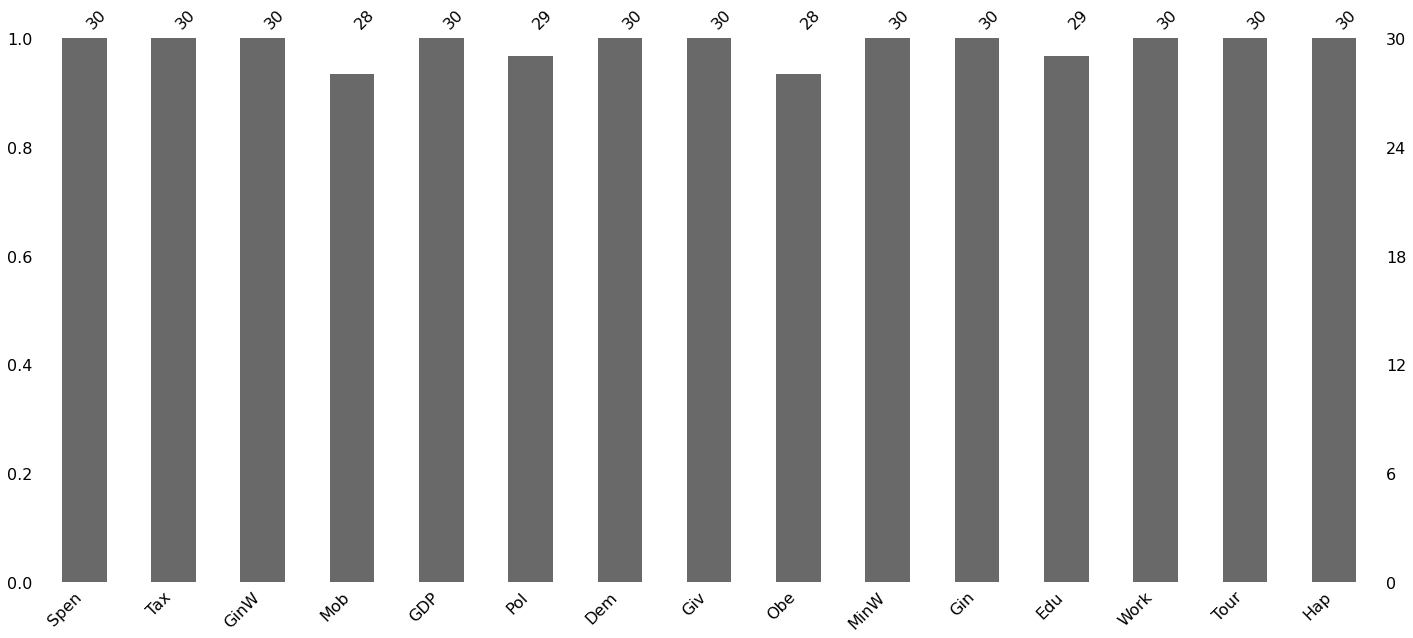

In [11]:
#Chart the features to see what % of each feature is missing, using the NaN
import missingno as msno
msno.bar(dataset)

In [12]:
#Replace the NaNs with the median for that feature
dataset = dataset.fillna(dataset.median())
#Alternative approach would be to remove the rows with the data gaps (with the NaN)

In [13]:
#Get basic descriptive stats of the dataset to understand mean, median, standard dev, range
dataset.describe()

,Spen,Tax,GinW,Mob,GDP,Pol,Dem,Giv,Obe,MinW,Gin,Edu,Work,Tour,Hap
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,39.76000,33.243333,31.572400,76.656667,55523.100000,10.313333,8.309000,39.166667,22.106667,20422.866667,33.076667,0.890500,1715.033333,3392.466667,6.884733
std,10.22332,9.384532,6.453264,4.905077,18636.364457,3.374727,0.941845,36.772444,6.999048,5187.485397,6.197201,0.042165,225.333849,2680.946253,0.588519
min,17.20000,8.900000,23.400000,67.400000,38807.000000,5.000000,6.030000,2.000000,4.300000,12093.000000,24.200000,0.793000,1354.000000,787.000000,5.295000
25%,35.97500,28.825000,27.000000,74.450000,42400.000000,8.375000,7.695000,13.250000,20.250000,15488.250000,28.725000,0.868750,1555.500000,1666.750000,6.468500
50%,40.10000,33.500000,30.350000,76.100000,51388.000000,9.700000,8.350000,31.000000,22.150000,20940.500000,32.750000,0.902000,1709.500000,2653.500000,7.026500
75%,47.57500,38.775000,34.092500,80.100000,58583.250000,11.775000,9.087500,46.250000,26.075000,23933.500000,35.275000,0.923500,1782.000000,4033.750000,7.306500
max,56.40000,46.200000,48.275000,85.200000,118002.000000,18.500000,9.810000,138.000000,36.200000,29793.000000,53.900000,0.943000,2237.000000,13445.000000,7.889000


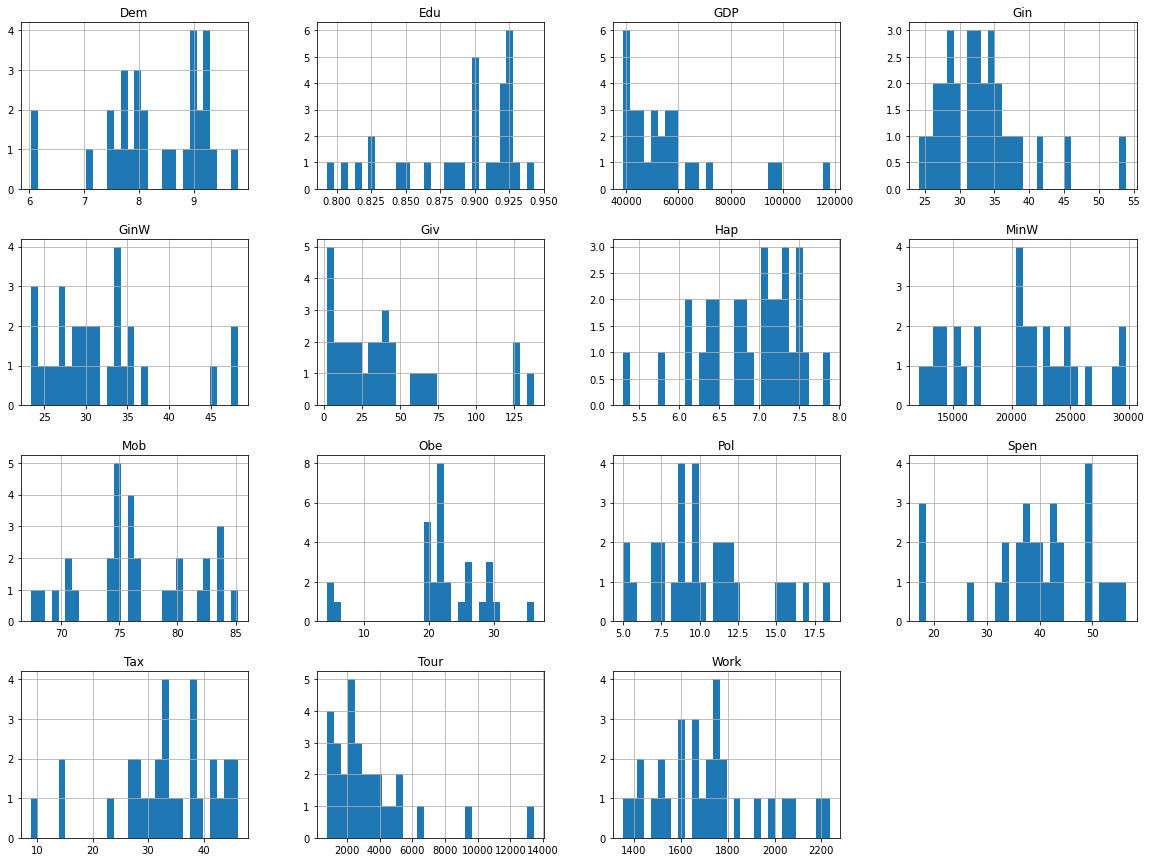

In [14]:
#Univariate histograms show us the distribution of each feature
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [15]:
#To inspect the correlation between different features, i.e. how they may or may not change with each other. 
#Values range from -1 to 1 and a value of 0 means no correlation at all.
#Pearson's correlation assumes a normal distribution of the features.
#Some ML algorithms don't work well if the data is highly correlated.
from pandas import set_option
set_option('display.width', 150)
set_option('precision', 2)
corr = dataset.corr(method='pearson')
print(corr)

          Spen   Tax      GinW   Mob   GDP   Pol   Dem   Giv       Obe  MinW   Gin       Edu  Work  Tour   Hap
Spen  1.00e+00  0.97 -5.97e-01  0.39 -0.28 -0.37  0.42  0.05  1.35e-01  0.19 -0.66  9.94e-03 -0.75  0.01  0.51
Tax   9.73e-01  1.00 -6.17e-01  0.39 -0.24 -0.32  0.37  0.06  9.85e-02  0.19 -0.65 -5.38e-02 -0.73  0.07  0.49
GinW -5.97e-01 -0.62  1.00e+00 -0.52  0.19  0.31 -0.54 -0.12 -2.87e-03 -0.30  0.94 -1.42e-01  0.60 -0.08 -0.49
Mob   3.94e-01  0.39 -5.18e-01  1.00  0.30 -0.68  0.54 -0.24 -1.17e-01  0.60 -0.48  3.71e-01 -0.58  0.29  0.58
GDP  -2.76e-01 -0.24  1.85e-01  0.30  1.00 -0.21  0.12 -0.36 -1.26e-01  0.38  0.24 -1.33e-01 -0.04  0.39  0.24
Pol  -3.72e-01 -0.32  3.08e-01 -0.68 -0.21  1.00 -0.63  0.31 -1.42e-01 -0.48  0.43 -5.82e-01  0.53 -0.15 -0.57
Dem   4.19e-01  0.37 -5.36e-01  0.54  0.12 -0.63  1.00 -0.30  2.52e-01  0.65 -0.56  4.67e-01 -0.68  0.16  0.76
Giv   4.82e-02  0.06 -1.16e-01 -0.24 -0.36  0.31 -0.30  1.00 -3.17e-01 -0.48 -0.11 -2.93e-01  0.14 -0.32 -0.34
O

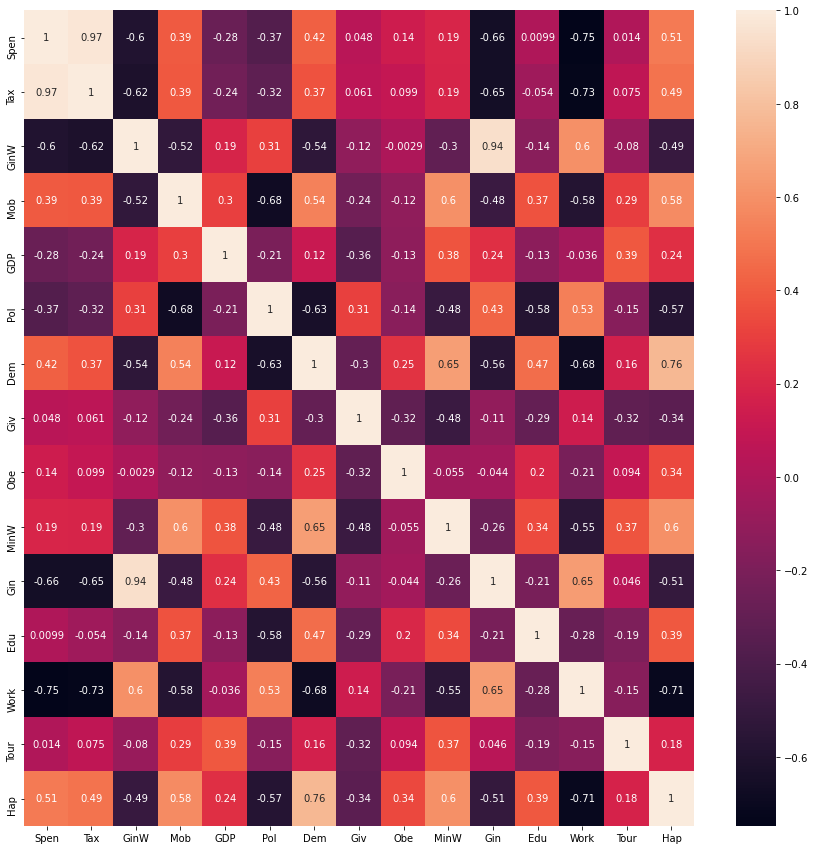

In [16]:
#View correlations as a heatmap matrix, lighter colours = more correlation
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot=True)

In [ ]:
#Scatterplot for the data
sns.pairplot(dataset, height = 1.5,)
#If classification, can use sns.pairplot(dataset, hue = '(insert name of Y variable)') to colour dots based on class)

In [ ]:
#Preparing the data for the decision tree model
#Separate the dataset into dependent (x) and independent (y, happiness score) components, starting with converting to array
array = dataset.values

X = array[:, 0:14]
Y = array[:, 14]


In [ ]:
#Split into training and test data
# We train the model on the training data and then test how good it is using the unseen test data
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

In [ ]:
print(X.shape)

In [ ]:
print(Y.shape)

In [ ]:
#Fit model #1 Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt3 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2)
dt3.fit(X, Y)

In [ ]:
#Test decision Tree model accuracy using test dataset
#resultdt = dt.score(X_test, Y_test)
#print("Test Set Accuracy of Decision Tree model: %.3f%%" % (resultdt*100.0))

In [ ]:
#Plot confusion matrix to see what proportion of diabetes cases are predicted correctly
#from sklearn.metrics import plot_confusion_matrix
#matrixdt = plot_confusion_matrix(dt, X_test, Y_test, cmap=plt.cm.Blues)
#plt.show(matrixdt)

In [ ]:
#Plot Decision Tree model as a tree using sklearn.tree, plot_tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,10))
fn = ['Spen', 'Tax', 'GinW', 'Mob', 'GDP', 'Pol', 'Dem', 'Giv', 'Obe', 'MinW', 'Gin', 'Edu', 'Work', 'Tour']
plot_tree(dt3, filled=True, ax=ax, feature_names = fn, rounded=True, precision = 2)
plt.show()

In [ ]:
dt3.feature_importances_

In [ ]:
#Fit model #1 Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt4 = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2)
dt4.fit(X, Y)

In [ ]:
#Plot Decision Tree model as a tree using sklearn.tree, plot_tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20,10))
fn = ['Spen', 'Tax', 'GinW', 'Mob', 'GDP', 'Pol', 'Dem', 'Giv', 'Obe', 'MinW', 'Gin', 'Edu', 'Work', 'Tour']
plot_tree(dt4, filled=True, ax=ax, feature_names = fn, rounded=True, precision = 2, fontsize=8)
plt.show()

In [ ]:
dt4.feature_importances_